<center>

# Tasks

<br/>

Machine Learning and Statistics

ATU 

Winter 2023/24

Lecturer: Ian McLoughlin

Author: Jamie Tohall

</center>

<br/>

***

<br/>

**<h3 style="text-align: center;">Task 1</h3>**

<br/>


> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as 'math'. In this task, you should write a function 'sqrt(x)' to approximate the square root of a floating point number 'x' without using the power operator or a package.
>
> Rather, you should use Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $zi+1$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i − \frac{z_i × z_i − x}{2z_i} $$

In [1]:
# Defining the function
def sqrt(x):
    # Inital guess for the square root
    z = x / 4.0

    # Create a loop for accurancy, also increased range from 100 to 1000 for more accurate output
    for i in range(1000):
        # Newtowns method for a better approximation
        z = z - (((z * z) - x) / (2 * z))

    # z should be a better approximation for the square root
    return z

In [2]:
# Testing the outcome of the function

sqrt(11)

3.3166247903554

In [3]:
# Using Python to compare results

11**0.5

3.3166247903554

***

<br/>

**<h3 style="text-align: center;">Task 2</h3>**

<br/>


> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use 'scipy.stats' to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

<br/>


<center>

|         |         | Biscuit   |       |
|---------|---------|-----------|-------|
|         |         |Chocolate  |Plain  |
|**Drink**| Coffee  |   43      |  57   |
|         |  Tea    |   56      |  45   |

<center/>


<br/>

**Importing Modules**

In [4]:
# Data frames.
import pandas as pd

# Shuffles.
import random

import numpy as np

# Statistics.
import scipy.stats as ss

from scipy.stats import chi2_contingency

from scipy.stats.contingency import crosstab



<br/>

**Raw Data**


In [5]:
# 43 people in total preferred the coffee and chocolate biscuit combination

coffee_chocolate = [['Coffee', 'Chocolate']] * 43

# Output
coffee_chocolate

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [6]:
# 56 people preferred tea and chocolate biscuit

tea_chocolate = [['Tea', 'Chocolate']] * 56

# Output
tea_chocolate

[['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'C

In [7]:
# 57 people preferred Coffee with a plain biscuit

coffee_plain = [['Coffee', 'Plain']] * 57

# Output
coffee_plain

[['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee'

In [8]:
# 45 people preferred tea with a plain biscuit

tea_plain = [['Tea', 'Plain']] * 45

# Output
tea_plain

[['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain']]

<br/>

**Merging raw data**

In [9]:
raw_data = coffee_chocolate + tea_chocolate + coffee_plain + tea_plain

raw_data

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [10]:
# Shuffle the data.
random.shuffle(raw_data)

# Show.
raw_data

[['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'

In [11]:
# Zip the list - make the rows columns and the columns rows.
# Interchanges the outer and inner lists.
Beverage, Biscuit = list(zip(*raw_data))

# Show.
Beverage, Biscuit

(('Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
 

In [12]:
# Create a data frame with two lists, 'beverage' and 'biscuit'.
df = pd.DataFrame({'Beverage': Beverage, 'Biscuit': Biscuit})

# Show
df

,Beverage,Biscuit
0,Tea,Chocolate
1,Tea,Plain
2,Tea,Plain
3,Tea,Chocolate
4,Coffee,Plain
...,...,...
196,Coffee,Plain
197,Tea,Chocolate
198,Coffee,Chocolate
199,Tea,Chocolate


<br/>

**Contingency Table**

In [13]:
# Perform Crosstabs Contingency
# store as variable contingencyTable
Table = pd.crosstab(index=df['Beverage'], columns=df['Biscuit'], margins=True)

# Show 
Table

Biscuit,Chocolate,Plain,All
Beverage,,,
Coffee,43,57,100
Tea,56,45,101
All,99,102,201


In [14]:
chisquare = ss.chi2_contingency(Table, correction=False)

chisquare

(3.113937364324669,
 0.5389425856850661,
 4,
 array([[ 49.25373134,  50.74626866, 100.        ],
        [ 49.74626866,  51.25373134, 101.        ],
        [ 99.        , 102.        , 201.        ]]))

In [15]:
# Perform Crosstabs Contingency.
cross = ss.contingency.crosstab(df['Beverage'], df['Biscuit'])

# Show.
cross

((array(['Coffee', 'Tea'], dtype=object),
  array(['Chocolate', 'Plain'], dtype=object)),
 array([[43, 57],
        [56, 45]]))

In [16]:
# The first variable values, and the second.
first, second = cross

# Show.
first, second

((array(['Coffee', 'Tea'], dtype=object),
  array(['Chocolate', 'Plain'], dtype=object)),
 array([[43, 57],
        [56, 45]]))


<br/>

**Statistical Test**

In [17]:

data = pd.DataFrame({'Biscuit': ['Chocolate', 'Plain'],
                     'Coffee': [43, 57],
                     'Tea': [56, 45]})


data.set_index('Biscuit', inplace=True)

In [24]:
results = ss.chi2_contingency(data)

# Show.
print("Chi-squared value:", chi2_contingency)
print("P-value:", p)

Chi-squared value: <function chi2_contingency at 0x000002D2F5602EE0>


NameError: name 'p' is not defined


<br/>

**Results**

***

<br/>

**<h3 style="text-align: center;">Task 3</h3>**

<br/>

> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

<br/>

**What is a T-Test?**

A T-Test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.
<br/>


The T-Test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests. The T-Test assumes your data:

1. Is independent
2. Is (approximately) normally distributed
3. Has a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

<br/>


When choosing a T-Test, you will need to consider two things: whether the groups being compared come from a single population or two different populations, and whether you want to test the difference in a specific direction.

<br/>

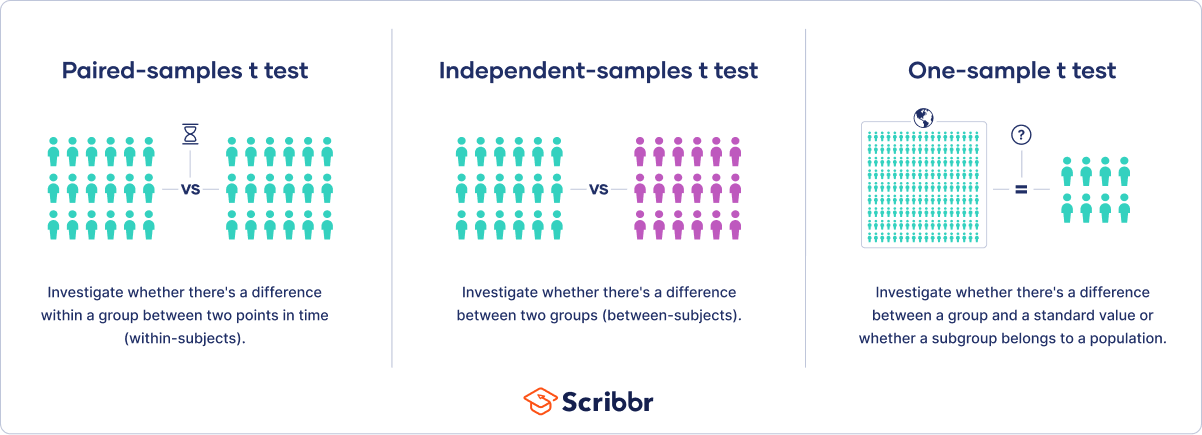

The formula for the two-sample T-Test (a.k.a. the Student’s T-Test):

<br/>

<center>

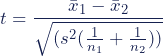

</center>

<br/>

Using the two sample T-test, t is the t value, x1 and x2 are the means of the two groups being compared, s2 is the pooled standard error of the two groups, and n1 and n2 are the number of observations in each of the groups.

A larger t value shows that the difference between group means is greater than the pooled standard error, indicating a more significant difference between the groups.

You can compare your calculated t value against the values in a critical value chart (e.g., Student’s t table) to determine whether your t value is greater than what would be expected by chance. If so, you can reject the null hypothesis and conclude that the two groups are in fact different. (Scribber.com)

<br/>

**Penguins Dataset**
<br/>

<center>

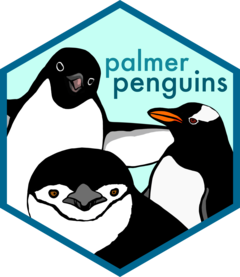

</center>

<br/>

The Palmer Penguins Dataset contains size measurements for 344 penguins which were observed on three islands in the Palmer Archipelago, Antarctica. The Data records the species of penguin, bill length, bill depth, flipper length, body mass, sex, and Island.
<br/>

These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The data were originally imported from the Environmental Data Initiative (EDI) Data Portal, and are available for use by CC0 license in accordance with the Palmer Station Data Policy.

<br/>


<br/>

**Importing Libraries**

In [19]:
# Plots
import matplotlib.pyplot as plt

# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Statistics
import scipy.stats as ss

<br/>

**Reading in the Dataset**

In [20]:

#Load penguin dataset
df = pd.read_csv('C:/Users/Jamie/Desktop/MLS/Machine_Learning_and_Statistics/CSV files/penguins.csv')

#Show 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<br/>

**Analysing the dataset**

In [21]:
# Viewing columns
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [25]:
# Description of data
df.describe

<bound method NDFrame.describe of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  

In [31]:
# Cleaning the data
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<br/>

**Pulling data on Gentoo Species**

In [33]:
# Only require information on gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

gentoo_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<br/>

**Bodymass of Male and Female**

In [34]:
# The body mass of males
sample_a = gentoo_df[gentoo_df['sex'] == 'MALE']['body_mass_g'].to_numpy()

sample_a

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

In [35]:
# The body mass of females
sample_b = gentoo_df[gentoo_df['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

sample_b

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

<br/>

**Perfom T-Test**

In [38]:
# t-test
ss.ttest_ind(sample_a, sample_b)

Ttest_indResult(statistic=14.721676481405709, pvalue=2.133687602018886e-28)

<br/>

**Results**



***

<br/>

<h3 style="text-align: center;">Task 4</h3>

<br/>

> Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


***

<br/>

<h3 style="text-align: center;">Task 5</h3>

<br/>

> Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose of the analysis and your results. 

***

<br/>

<h3 style="text-align: center;">References</h3>

**Task 1**

1. https://atlantictu-my.sharepoint.com/:v:/r/personal/ian_mcloughlin_atu_ie/Documents/student_shares/machine_learnning_and_statistics/1_general/t01v11_task_one_and_repo.mkv?csf=1&web=1&e=kuIJoM&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZyIsInJlZmVycmFsQXBwUGxhdGZvcm0iOiJXZWIiLCJyZWZlcnJhbE1vZGUiOiJ2aWV3In19

2. https://go.dev/tour/flowcontrol/8

3. https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

<br/>

**Task 2**

1. https://en.wikipedia.org/wiki/Chi-squared_test

2. https://www.jmp.com/en_be/statistics-knowledge-portal/chi-square-test.html

3. https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests

4. https://statistics.laerd.com/spss-tutorials/chi-square-test-for-association-using-spss-statistics.php

5. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

6. https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d


<br/>

**Task 3**

1. https://www.researchgate.net/publication/361755492_Data_Analysis_Using_Statistical_Methods_Case_Study_of_Categorizing_the_Species_of_Penguin

2. https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%20test%20is%20a,are%20different%20from%20one%20another.

3. https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

4. https://allisonhorst.github.io/palmerpenguins/articles/intro.html

5. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081

6. 


<br/>

**Task 4**

**Task 5**